# Asymptotic expansion of ODEs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, solve_bvp
%matplotlib inline

In [2]:
plt.rcParams.update({'font.size': 18})
plt.style.use('seaborn-poster')

## Regular perturbation method

### Example

We consider the ODE
$$
y' = -y + \epsilon y^2, \quad y(0)=1, \quad \epsilon\ll 1.
$$


In [3]:
a = 0.0
b = 10.0
t_eval = np.arange(a, b, 0.01)

y0 = 1.0

eps1 = 0.0
F1 = lambda t, y: -y + eps1*(y**2)

sol1 = solve_ivp(F1, [a, b], [y0], t_eval=t_eval)

eps2 = 0.01
F2 = lambda t, y: -y + eps2*(y**2)
sol2 = solve_ivp(F2, [a, b], [y0], t_eval=t_eval)

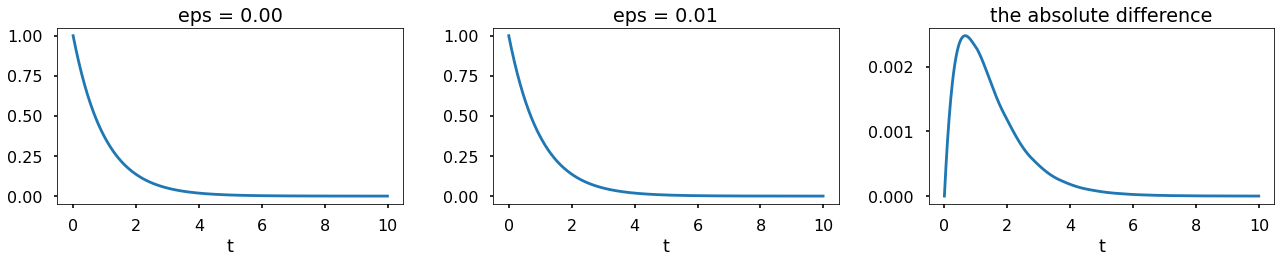

In [4]:
plt.figure(figsize = (18, 4))

plt.subplot(131)
plt.plot(sol1.t, sol1.y[0])
plt.xlabel('t')
plt.title("eps = %.2f" % eps1)

plt.subplot(132)
plt.plot(sol2.t, sol2.y[0])
plt.xlabel('t')
plt.title("eps = %.2f" % eps2)

plt.subplot(133)
plt.plot(sol2.t, np.abs(sol1.y[0] - sol2.y[0]))
plt.xlabel('t')
plt.title('the absolute difference')

plt.tight_layout()
plt.show()

---

## WKB approximation

### Example 1

We consider the ODE
$$
\epsilon^2 y'' + x^2 y=0, \quad y(0)=1,\quad y(1)=1, \quad \epsilon\ll 1.
$$

To use `solve_bvp', we rewrite it as a 1st-order system
$$
\begin{align}
y_1' &= y_2, \quad  y_1(0)=1, \quad y_1(1)=1,\\
y_2' &= -x^2 y_1/\epsilon^2, 
\end{align}
$$

In [5]:
def func(t,y,eps):
    return np.array([y[1], -(t**2)*y[0]/(eps**2)])
def bc(ya,yb):
    return np.array([ya[0] - 1, yb[0]-1.0])

eps1 = 0.1;
ode1 = lambda t,y: func(t, y, eps1);

eps2 = 0.01;
ode2 = lambda t,y: func(t, y, eps2);

eps3 = 0.001;
ode3 = lambda t,y: func(t, y, eps3);

#===
# the time domain.
t_steps = 100
t = np.linspace(0, 1.0, t_steps)
# the initial guess.
y0 = np.ones((2,t_steps))

# Solve the system.
sol1 = solve_bvp(ode1, bc, t, y0)
sol2 = solve_bvp(ode2, bc, t, y0)
sol3 = solve_bvp(ode3, bc, t, y0)

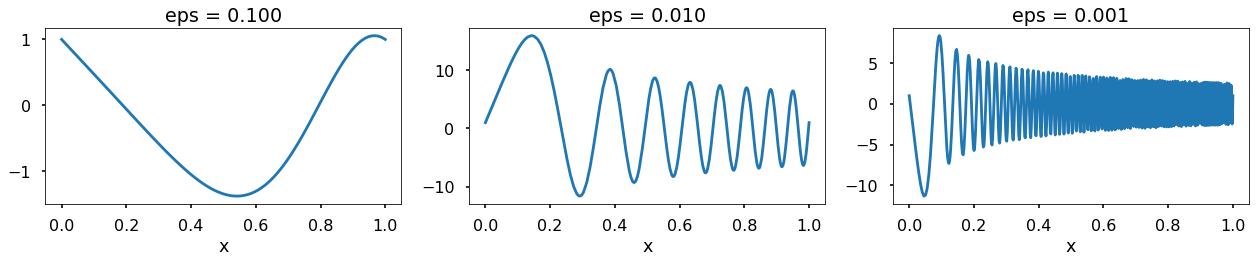

In [6]:
plt.figure(figsize = (18, 4))

plt.subplot(131)
plt.plot(sol1.x, sol1.y[0])
plt.xlabel('x')
plt.title("eps = %.3f" % eps1)

plt.subplot(132)
plt.plot(sol2.x, sol2.y[0])
plt.xlabel('x')
plt.title("eps = %.3f" % eps2)

plt.subplot(133)
plt.plot(sol3.x, sol3.y[0])
plt.xlabel('x')
plt.title("eps = %.3f" % eps3)

plt.tight_layout()
plt.show()

### Example 2

We consider the ODE
$$
\epsilon^2 y'' - x^2 y=0, \quad y(0)=1,\quad, y(1)=1, \quad \epsilon\ll 1.
$$

To use `solve_bvp', we rewrite it as a 1st-order system
$$
\begin{align}
y_1' &= y_2, \quad  y_1(0)=1, \quad y_1(1)=1,\\
y_2' &= x^2 y_1/\epsilon^2, 
\end{align}
$$

In [7]:
def func(t,y,eps):
    return np.array([y[1], (t**2)*y[0]/(eps**2)])
def bc(ya,yb):
    return np.array([ya[0] - 1, yb[0]-1.0])

eps1 = 0.1;
ode1 = lambda t,y: func(t, y, eps1);

eps2 = 0.01;
ode2 = lambda t,y: func(t, y, eps2);

eps3 = 0.001;
ode3 = lambda t,y: func(t, y, eps3);

#===
# the time domain.
t_steps = 100
t = np.linspace(0, 1.0, t_steps)
# the initial guess.
y0 = np.ones((2,t_steps))

# Solve the system.
sol1 = solve_bvp(ode1, bc, t, y0)
sol2 = solve_bvp(ode2, bc, t, y0)
sol3 = solve_bvp(ode3, bc, t, y0)

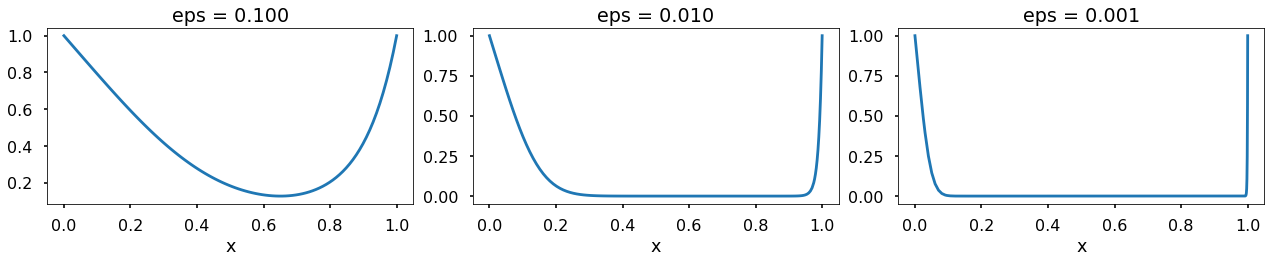

In [8]:
plt.figure(figsize = (18, 4))

plt.subplot(131)
plt.plot(sol1.x, sol1.y[0])
plt.xlabel('x')
plt.title("eps = %.3f" % eps1)

plt.subplot(132)
plt.plot(sol2.x, sol2.y[0])
plt.xlabel('x')
plt.title("eps = %.3f" % eps2)

plt.subplot(133)
plt.plot(sol3.x, sol3.y[0])
plt.xlabel('x')
plt.title("eps = %.3f" % eps3)

plt.tight_layout()
plt.show()

### Example 3

We consider the ODE
$$
\epsilon^2 y'' - (x-0.5) y=0, \quad y(0)=1,\quad y(1)=1, \quad \epsilon\ll 1.
$$

To use `solve_bvp', we rewrite it as a 1st-order system
$$
\begin{align}
y_1' &= y_2, \quad  y_1(0)=1, \quad y_1(1)=1,\\
y_2' &= (x-0.5) y_1/\epsilon^2, 
\end{align}
$$

In [9]:
def func(t,y,eps):
    return np.array([y[1], (t-0.5)*y[0]/(eps**2)])
def bc(ya,yb):
    return np.array([ya[0] - 1, yb[0]-1.0])

eps1 = 0.1;
ode1 = lambda t,y: func(t, y, eps1);

eps2 = 0.01;
ode2 = lambda t,y: func(t, y, eps2);

eps3 = 0.001;
ode3 = lambda t,y: func(t, y, eps3);

#===
# the time domain.
t_steps = 100
t = np.linspace(0, 1.0, t_steps)
# the initial guess.
y0 = np.ones((2,t_steps))

# Solve the system.
sol1 = solve_bvp(ode1, bc, t, y0)
sol2 = solve_bvp(ode2, bc, t, y0)
sol3 = solve_bvp(ode3, bc, t, y0)

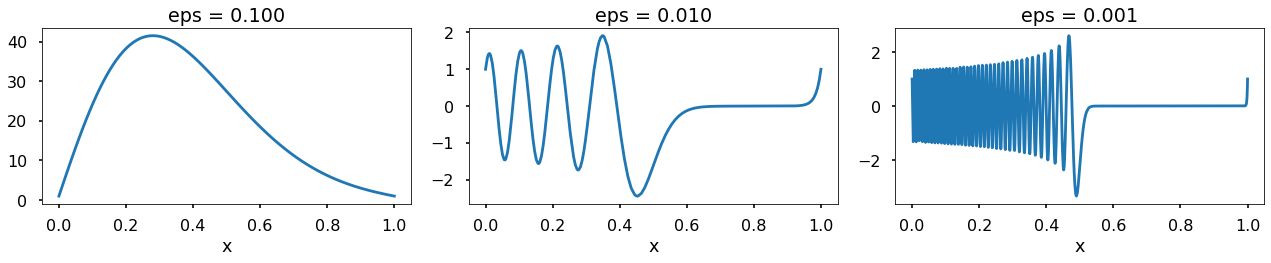

In [10]:
plt.figure(figsize = (18, 4))

plt.subplot(131)
plt.plot(sol1.x, sol1.y[0])
plt.xlabel('x')
plt.title("eps = %.3f" % eps1)

plt.subplot(132)
plt.plot(sol2.x, sol2.y[0])
plt.xlabel('x')
plt.title("eps = %.3f" % eps2)

plt.subplot(133)
plt.plot(sol3.x, sol3.y[0])
plt.xlabel('x')
plt.title("eps = %.3f" % eps3)

plt.tight_layout()
plt.show()

---

## Matched asymptotic expansions

### Example 1

We consider the ODE
$$
\epsilon y'' + y' = \cos(x), \quad y(0)=2, \quad y(\pi)=-1, \quad \epsilon\ll 1.
$$

To use `solve_bvp', we rewrite it as a 1st-order system
$$
\begin{align}
y_1' &= y_2, \quad  y_1(0)=2, \quad y_1(\pi)=-1,\\
y_2' &= (\cos(x) - y_2)/\epsilon, 
\end{align}
$$

In [11]:
def func(t,y,eps):
    return np.array([y[1], (np.cos(t)-y[1])/eps])
def bc(ya,yb):
    return np.array([ya[0] - 2, yb[0]+1.0])

eps1 = 0.1;
ode1 = lambda t,y: func(t, y, eps1);

eps2 = 0.01;
ode2 = lambda t,y: func(t, y, eps2);

eps3 = 0.001;
ode3 = lambda t,y: func(t, y, eps3);

#===
# the time domain.
t_steps = 100
t = np.linspace(0, np.pi, t_steps)
# the initial guess.
y0 = np.ones((2,t_steps))

# Solve the system.
sol1 = solve_bvp(ode1, bc, t, y0)
sol2 = solve_bvp(ode2, bc, t, y0)
sol3 = solve_bvp(ode3, bc, t, y0)

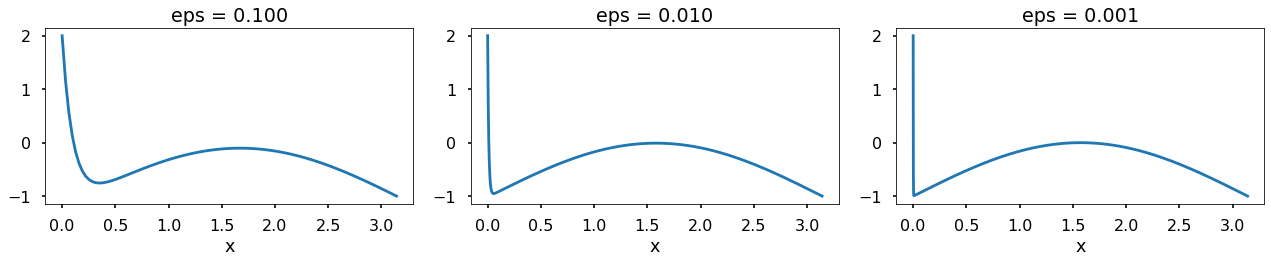

In [12]:
plt.figure(figsize = (18, 4))

plt.subplot(131)
plt.plot(sol1.x, sol1.y[0])
plt.xlabel('x')
plt.title("eps = %.3f" % eps1)

plt.subplot(132)
plt.plot(sol2.x, sol2.y[0])
plt.xlabel('x')
plt.title("eps = %.3f" % eps2)

plt.subplot(133)
plt.plot(sol3.x, sol3.y[0])
plt.xlabel('x')
plt.title("eps = %.3f" % eps3)

plt.tight_layout()
plt.show()

### Example 2

We consider the initial value problem
$$
\epsilon y' + y^2 = 4 - x^2, \quad y(0)=\frac{3}{2}, \quad \epsilon\ll 1.
$$

In [13]:
a = 0.0
b = 2.05
t_eval = np.arange(a, b, 0.0001)

y0 = 1.5

lambd = 0.1
F = lambda t, y: (4 -t**2 - y**2)/lambd
sol = solve_ivp(F, [a, b], [y0], t_eval=t_eval)

lambd2 = 0.01
F2 = lambda t, y: (4 -t**2 - y**2)/lambd2
sol2 = solve_ivp(F2, [a, b], [y0], t_eval=t_eval)

lambd3 = 0.001
F3 = lambda t, y: (4 -t**2 - y**2)/lambd3
sol3 = solve_ivp(F3, [a, b], [y0], t_eval=t_eval)

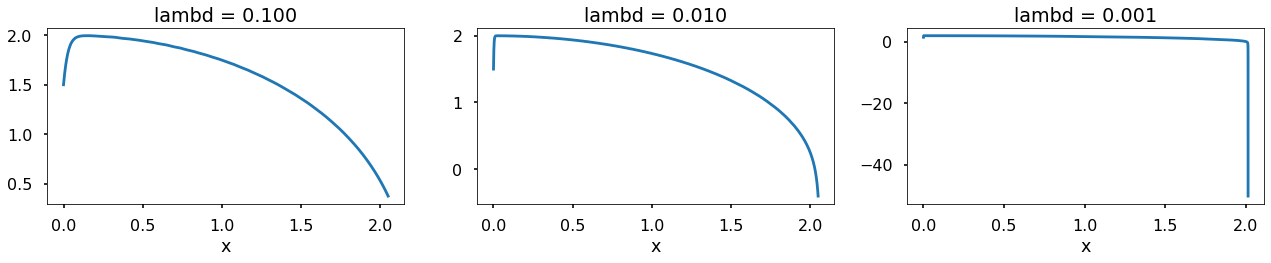

In [14]:
plt.figure(figsize = (18, 4))

plt.subplot(131)
plt.plot(sol.t, sol.y[0])
plt.xlabel('x')
plt.title("lambd = %.3f" % lambd)

plt.subplot(132)
plt.plot(sol2.t, sol2.y[0])
plt.xlabel('x')
plt.title("lambd = %.3f" % lambd2)

plt.subplot(133)
plt.plot(sol3.t, sol3.y[0])
plt.xlabel('x')
plt.title("lambd = %.3f" % lambd3)

plt.tight_layout()
plt.show()

---

## Method of multiple scales

### Example 1

We consider the initial value problem
$$
y'' + \epsilon y' + y = 0, \quad y(0)=0, \quad y'(0)=1, \quad \epsilon\ll 1.
$$

In [15]:
def func(t,y,eps):
    return np.array([y[1], -eps*y[1]-y[0]])
def bc(ya,yb):
    return np.array([ya[0] - 1, yb[0]-1.0])

eps1 = 0.1;
ode1 = lambda t,y: func(t, y, eps1);

eps2 = 0.01;
ode2 = lambda t,y: func(t, y, eps2);

eps3 = 0.001;
ode3 = lambda t,y: func(t, y, eps3);

a = 0.0
b = 100.0
t_eval = np.arange(a, b, 0.1)

y0 = [0.0, 1.0]

# Solve the system.
sol1 = solve_ivp(ode1, [a, b], y0, t_eval=t_eval)
sol2 = solve_ivp(ode2, [a, b], y0, t_eval=t_eval)
sol3 = solve_ivp(ode3, [a, b], y0, t_eval=t_eval)

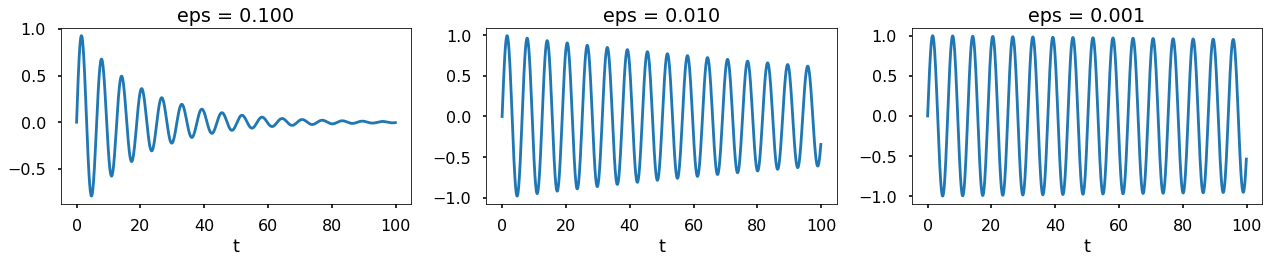

In [16]:
plt.figure(figsize = (18, 4))

plt.subplot(131)
plt.plot(sol1.t, sol1.y[0])
plt.xlabel('t')
plt.title("eps = %.3f" % eps1)

plt.subplot(132)
plt.plot(sol2.t, sol2.y[0])
plt.xlabel('t')
plt.title("eps = %.3f" % eps2)

plt.subplot(133)
plt.plot(sol3.t, sol3.y[0])
plt.xlabel('t')
plt.title("eps = %.3f" % eps3)

plt.tight_layout()
plt.show()

### Example 2

We consider the initial value problem
$$
y'' + (\epsilon t) y = 0, \quad y(0)=0, \quad y'(0)=1, \quad \epsilon\ll 1.
$$

In [17]:
def func(t,y,eps):
    return np.array([y[1], -eps*t*y[0]])
def bc(ya,yb):
    return np.array([ya[0] - 1, yb[0]-1.0])

eps1 = 0.1;
ode1 = lambda t,y: func(t, y, eps1);

eps2 = 0.01;
ode2 = lambda t,y: func(t, y, eps2);

eps3 = 0.001;
ode3 = lambda t,y: func(t, y, eps3);

a = 0.0
b = 100.0
t_eval = np.arange(a, b, 0.1)

y0 = [0.0, 1.0]

# Solve the system.
sol1 = solve_ivp(ode1, [a, b], y0, t_eval=t_eval)
sol2 = solve_ivp(ode2, [a, b], y0, t_eval=t_eval)
sol3 = solve_ivp(ode3, [a, b], y0, t_eval=t_eval)

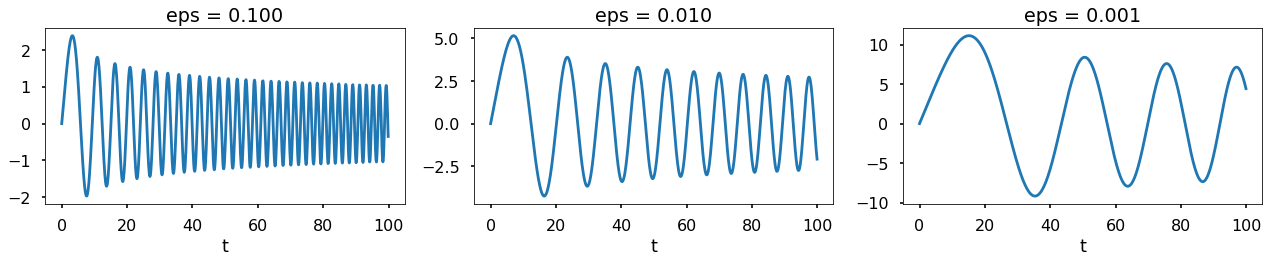

In [18]:
plt.figure(figsize = (18, 4))

plt.subplot(131)
plt.plot(sol1.t, sol1.y[0])
plt.xlabel('t')
plt.title("eps = %.3f" % eps1)

plt.subplot(132)
plt.plot(sol2.t, sol2.y[0])
plt.xlabel('t')
plt.title("eps = %.3f" % eps2)

plt.subplot(133)
plt.plot(sol3.t, sol3.y[0])
plt.xlabel('t')
plt.title("eps = %.3f" % eps3)

plt.tight_layout()
plt.show()

### Example 3

We consider the initial value problem
$$
y'' + y + \epsilon y^3= 0, \quad y(0)=1, \quad y'(0)=0, \quad \epsilon\ll 1.
$$

In [19]:
def func(t,y,eps):
    return np.array([y[1], -y[0] - eps*(y[0]**3)])
def bc(ya,yb):
    return np.array([ya[0] - 1, yb[0]])

eps1 = 0;
ode1 = lambda t,y: func(t, y, eps1);

eps2 = 0.1;
ode2 = lambda t,y: func(t, y, eps2);

a = 0.0
b = 100.0
t_eval = np.arange(a, b, 0.1)

y0 = [1.0, 0.0]

# Solve the system.
sol1 = solve_ivp(ode1, [a, b], y0, t_eval=t_eval)
sol2 = solve_ivp(ode2, [a, b], y0, t_eval=t_eval)

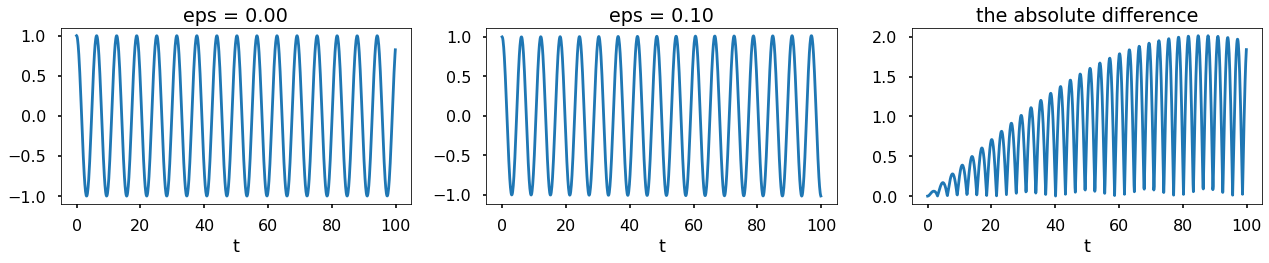

In [20]:
plt.figure(figsize = (18, 4))

plt.subplot(131)
plt.plot(sol1.t, sol1.y[0])
plt.xlabel('t')
plt.title("eps = %.2f" % eps1)

plt.subplot(132)
plt.plot(sol2.t, sol2.y[0])
plt.xlabel('t')
plt.title("eps = %.2f" % eps2)

plt.subplot(133)
plt.plot(sol2.t, np.abs(sol1.y[0] - sol2.y[0]))
plt.xlabel('t')
plt.title('the absolute difference')

plt.tight_layout()
plt.show()

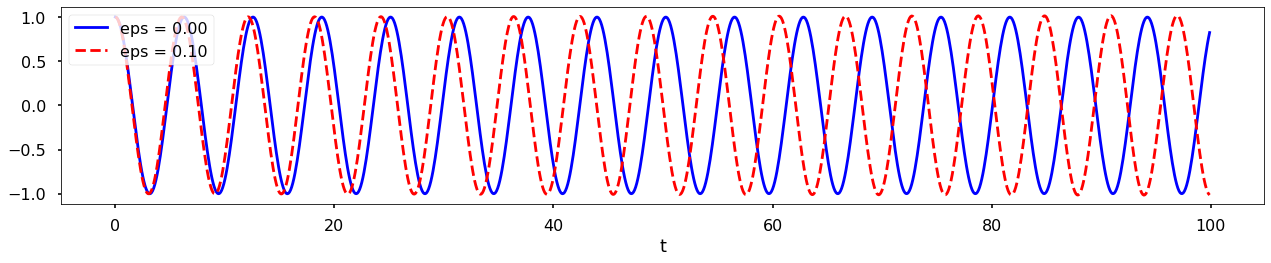

In [21]:
plt.figure(figsize = (18, 4))

plt.plot(sol1.t, sol1.y[0], 'b', label= "eps = %.2f" % eps1)
plt.plot(sol2.t, sol2.y[0], 'r--', label= "eps = %.2f" % eps2)
plt.xlabel('t')
plt.legend(loc = 2)

plt.tight_layout()
plt.show()